Yigit Can Tasoglu
528211079

In [3]:
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from IPython.display import display, HTML

In [4]:
pytrends = TrendReq(hl='en-US', tz=360)

In [5]:
def set_new_query(kwords, timeframe):
    pytrends.build_payload(kwords, cat=0, timeframe=timeframe, geo='', gprop='')
    return kwords

In [6]:
def get_interest_over_time():
    df_ = pytrends.interest_over_time()
    df_.drop(['isPartial'], axis='columns', inplace=True)
    df_.reset_index(inplace=True)
    df_.date = pd.to_datetime(df_.date, format='%Y-%m-%d')
    df_.rename(columns={'date': 'Date'}, inplace=True)
    return df_

In [7]:
def get_interest_by_region(): 
    df_ = pytrends.interest_by_region(resolution='COUNTRY')
    df_ = df_.loc[~(df_==0).all(axis=1)]
    df_.reset_index(inplace=True)
    df_.rename(columns={'geoName': 'Region'}, inplace=True)
    return df_

In [8]:
def get_related_queries(): 
    return pytrends.related_queries()

In [9]:
def get_related_topics():
    return pytrends.related_topics()

# Some useful functions

In [10]:
def plot_interest_over_time(kwords, dataframe=None, update=False):
    
    color_list = ['navy', 'red', 'green', 'magenta', 'orange', 'purple']
    data = []
    
    if update:
        df_ = get_interest_over_time()
    else:
        df_ = dataframe
   
    if dataframe is not None:
        dataframe = df_

    for i in range(len(kwords)):
        trace = go.Scatter(x=list(df_.Date),
                          y=list(df_[kwords[i]]),
                          name = kwords[i],
                          line = dict(color = color_list[i])
                         )
        data.append(trace)
    
    layout = dict(
        title='Interest over time',
        yaxis={'title': 'Interest'},
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(count=1,
                        label='YTD',
                        step='year',
                        stepmode='todate'),
                    dict(count=1,
                        label='1y',
                        step='year',
                        stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    py.iplot(fig)
    return df_

In [11]:
def table_interest_over_time(kwords, dataframe=None, update=False):
    if update:
        df_ = get_interest_over_time()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_
    py.iplot(ff.create_table(df_.tail(10)))
    return df_

In [12]:
def table_interest_by_region(kwords, dataframe=None, update=False):
    if update:
        df_ = get_interest_by_region()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_
    py.iplot(ff.create_table(df_.head(10)))
    return df_

In [13]:
def barplot_interest_by_region(kwords, dataframe=None, update=False):
    
    if update:
        df_ = get_interest_by_region()
    else:
        df_ = dataframe
    if dataframe is not None:
        dataframe = df_

    x = df_.Region

    data = []

    for each in kwords:
        trace = {
          'x': x,
          'y': df_[each],
          'name': each,
          'type': 'bar'
        }
        data.append(trace)

    layout = {
      'xaxis': {'title': 'Countries'},
      'yaxis': {'title': 'Interest'},
      'barmode': 'relative',
      'title': 'Compared breakdown by country'
    }

    py.iplot({'data': data, 'layout': layout})
    return df_

In [14]:
def table_related_queries(kwords, queries, n=10):
    for each in kwords:
        df_rq_top = pd.DataFrame(queries[each]['top'])
        df_rq_rising = pd.DataFrame(queries[each]['rising'])
        df_rq = pd.concat([df_rq_top, df_rq_rising], axis=1, keys=(["Top", "Rising"])).reset_index(drop=True)
        df_rq.index = np.arange(1, len(df_rq) + 1)
        print(each + " related queries")
        display(df_rq.head(n))

In [15]:
def table_related_topics(kwords, topics, n=10):
    for each in kwords:
        df_rq_top = pd.DataFrame(topics[each]['top'])
        df_rq_rising = pd.DataFrame(topics[each]['rising'])
        df_rq = pd.concat([df_rq_top, df_rq_rising], axis=1, keys=(["Top", "Rising"])).reset_index(drop=True)
        df_rq.index = np.arange(1, len(df_rq) + 1)
        print(each + " topics")
        display(df_rq.head(n))
        #df_ = pd.DataFrame(topics[each])
        #df_.drop(['mid'], axis='columns', inplace=True)
        #print(each + " related topics")
        #py.iplot(ff.create_table(df_.head(n)))

Q1: Please discuss  Recent big data tools and big data platforms comparision between on-prem and cloud – use code based statistical analysis. Is there any increase wrt other? Please use advanced statistical interpretation (as code based) for your findings?

In [16]:
kw_list = set_new_query(["Big data tools", "Big data platforms"], "all")
df = table_interest_over_time(kw_list, None, True);

In [17]:
display(df.describe().T.round(2))
display(df.corr().round(2))

,count,mean,std,min,25%,50%,75%,max
Big data tools,219.0,35.11,34.10,0.0,0.0,30.0,69.0,100.0
Big data platforms,219.0,4.25,5.45,0.0,0.0,2.0,7.0,35.0


,Big data tools,Big data platforms
Big data tools,1.00,0.78
Big data platforms,0.78,1.00


First we need to delete last entry in order to prevent wrong statistical analysis. Most probably we have limitation and we can't get the data for the last 2 days.

In [18]:
df = df[:-1]

In [19]:
plot_interest_over_time(kw_list, df);

Lets check first pearson correlation by time. We can use moving average of 10 days to have more precise result.

In [20]:
# Set window size to compute moving average.
window_size = 10
# Create new columns for Moving Average
df['Big data tools MA10'] = df['Big data tools'].rolling(window_size).mean()
df['Big data platforms MA10'] = df['Big data platforms'].rolling(window_size).mean()

In [21]:
import plotly.express as px

fig = px.line(df, x=df['Date'], y=df.columns, title = 'Line Graph for all Features')
fig.show()

In [22]:
df['Pearson'] = df['Big data tools'].rolling(10).corr(df['Big data platforms'])
df['Pearson'] = df['Big data tools'].rolling(10).corr(df['Big data platforms'])

In [23]:
fig = px.line(df, x=df['Date'], y=df['Pearson'], title = 'Line Graph for Pearson')
fig.show()

Scatter of Big data tools and Big data platforms

In [24]:
fig = px.scatter(x=df['Big data tools'], y=df['Big data platforms'],trendline="ols")
fig.show()

Scatter of Big data tools and Big data platforms with Moving Average

In [25]:
fig = px.scatter(x=df['Big data tools MA10'], y=df['Big data platforms MA10'],trendline="ols")
fig.show()

In [26]:
df = df[df['Big data tools MA10'].notna()]
df = df[df['Big data platforms MA10'].notna()]



In [27]:
from scipy.stats import linregress
linregress(df['Big data tools'], df['Big data platforms'])

LinregressResult(slope=0.12562740441920558, intercept=-0.12632263082972273, rvalue=0.776436680072734, pvalue=2.204550950118456e-43, stderr=0.007087095930423926, intercept_stderr=0.3527298552474945)

In [28]:
linregress(df['Big data tools MA10'], df['Big data platforms MA10'])

LinregressResult(slope=0.12579257950224448, intercept=-0.2307702051449061, rvalue=0.879503234721066, pvalue=1.1040732079248386e-68, stderr=0.004730876839152507, intercept_stderr=0.22820439071061607)

 I checked the slope and r values with 2 different analysis. First with raw data and than with MA10.
 Both rvalues are close to 1 and statistically significant. We can understand it from so small pvalue. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

Lets check the pvalue and rvalue for the Big data tools feature and its moving average data. The aim of this to be able to evaluate the relation limit.

In [29]:
from scipy.stats import linregress
linregress(df['Big data tools MA10'], df['Big data platforms'])

LinregressResult(slope=0.13242603536911968, intercept=-0.16176999052626684, rvalue=0.8055010493955903, pvalue=6.2668603157424326e-49, stderr=0.006771417595399835, intercept_stderr=0.3266344229925429)

As we can see all analysis show that there is a strong relation between Big data tools and platforms

Lets filter the data between 2012 and 2017 and re-evaluate the relationships. I selected 2012-2017 since there is a clear trend for Big data tools

In [30]:
#import datetime
#datetime.datetime.strptime
start_date = '2012-01-01'
end_date = '2017-12-31'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
  
df_filtered = df.loc[mask]
df_filtered = df_filtered.reset_index(drop=True)

In [31]:
fig = px.scatter(x=df_filtered['Big data tools'], y=df_filtered['Big data platforms'],trendline="ols")
fig.show()

In [32]:
fig = px.scatter(x=df_filtered['Big data tools MA10'], y=df_filtered['Big data platforms MA10'],trendline="ols")
fig.show()

In [33]:
linregress(df_filtered['Big data tools MA10'], df_filtered['Big data platforms MA10'])

LinregressResult(slope=0.09907428305064259, intercept=-0.4253259684118902, rvalue=0.9375551444715985, pvalue=2.306787611247499e-33, stderr=0.004425016965858119, intercept_stderr=0.24615986229447012)

In [34]:
linregress(df_filtered['Big data tools'], df_filtered['Big data platforms'])

LinregressResult(slope=0.1057445986031578, intercept=-0.6637443943044712, rvalue=0.7448748948312613, pvalue=9.504559240404631e-14, stderr=0.011402735643770645, intercept_stderr=0.6807091656316299)

Again rvalue is quite high while pvalue is less than 0.05.  It indicates again strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

Let's try another method to check relations between Big data tools and Big data platforms.

Time Lagged Cross Correlation: I wanted to implement TLCC to understand if both signal have leader-follower relationship. The leader initiates a response which is repeated by the follower.

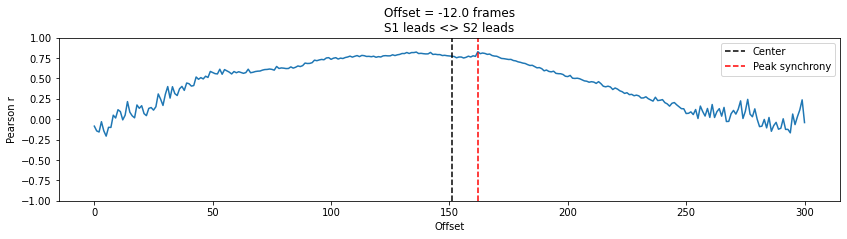

In [35]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Big data tools']
d2 = df['Big data platforms']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-1,1], xlabel='Offset',ylabel='Pearson r')

plt.legend()

From plot above we can infer from the negative offset that Big data tools is leading the interaction (correlation is maximized when Big data platforms is pulled forward by 12 frames). Also it show we have pearson correlation most of the time around 0.6. That shows the relationship between 2 variables.

Q2: What are the highlighted big data projects in last two years? As stated in the first bullet, please check details from trends data – i.e. using keyword for international  airline companies, manufacturing, finance, e-commerce. Is there any correlation wrt search keywords? What is popular tools (services) in recent years? How you quantify it? Please support your statements with your findings (from literature) and discuss it in detail? 


****   I couldn't understand the Q2 but, still I checked some queries and graphs...****

What are the highlighted big data projects in last two years?

In [56]:
#First we need to select the data for last 2 years.
kw_list = set_new_query(["big data tools",], "2020-03-01 2022-03-01")

In [57]:
table_related_queries(kw_list, get_related_queries())

big data tools related queries


Top        \
                           query value   
1           data analytics tools   100   
2       big data analytics tools    99   
3             big data analytics    99   
4                 data analytics    99   
5             tools for big data    91   
6               what is big data    30   
7   tools for big data analytics    20   
8              big data analysis    19   
9        big data analysis tools    19   
10           data analysis tools    19   

                                               Rising           
                                                query    value  
1   we analyze big data with a variety of statisti...  13050.0  
2                         characteristics of big data    300.0  
3                    structured and unstructured data    300.0  
4                                              looker    170.0  
5             big data analytics tools and techniques     70.0  
6                         analytic tools for big data     60.0  
7                                                hdfs     60.0  
8                           big data processing tools     60.0  
9                                 big data processing     60.0  
10                    big data tools and technologies     50.0

In [58]:
kw_list = set_new_query(["openrefine", "aws glue", "power bi", "hdfs", "kafka",	], "2020-03-01 2022-03-01")
df_tools = table_interest_over_time(kw_list, None, True);


In [59]:
fig = px.line(df_tools, x=df_tools['Date'], y=df_tools.columns, title = 'Line Graph for all Features')
fig.show()

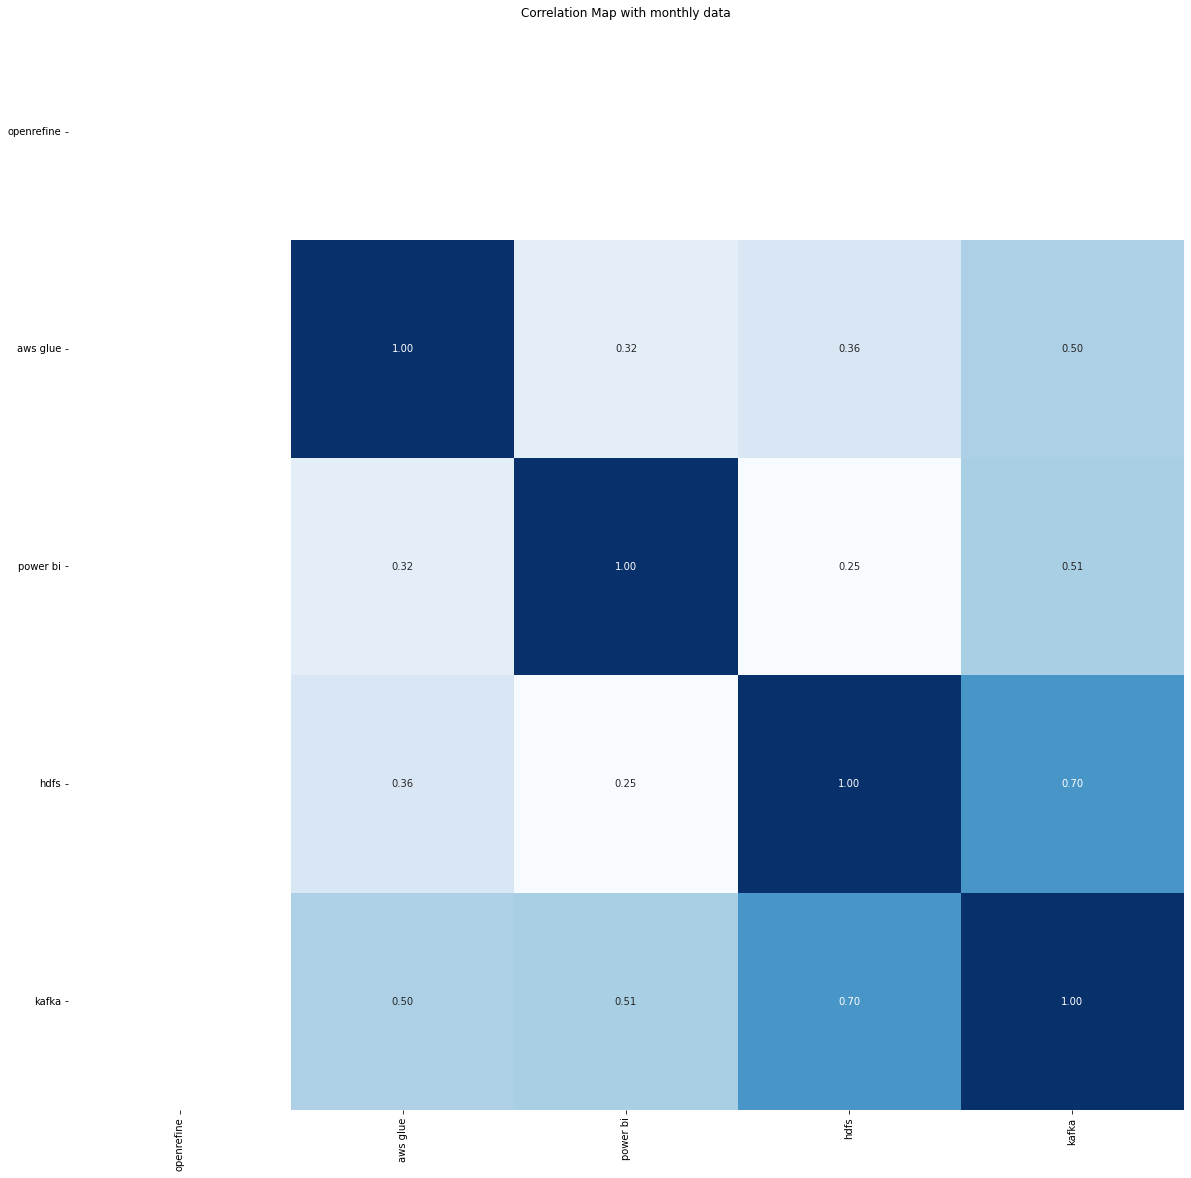

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(df_tools.corr(),cmap='Blues',annot=True,fmt = ".2f",cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Map with monthly data')
plt.show()

In [61]:
#First we need to select the data for last 2 years.
kw_list = set_new_query(["manufacturing", "finance", "e-commerce",], "2020-03-01 2022-03-01")

In [62]:
df_kwords = table_interest_over_time(kw_list, None, True);

In [63]:
fig = px.line(df_kwords, x=df_kwords['Date'], y=df_kwords.columns, title = 'Line Graph for all Features')
fig.show()

In [64]:
#First we need to select the data for last 2 years.
kw_list_bigdata = set_new_query(["big data manufacturing", "big data finance", "big data e-commerce",], "2019-03-01 2021-03-01")

In [65]:
df_kwords = table_interest_over_time(kw_list_bigdata, None, True);

In [66]:
fig = px.line(df_kwords, x=df_kwords['Date'], y=df_kwords.columns, title = 'Line Graph for all Features')
fig.show()

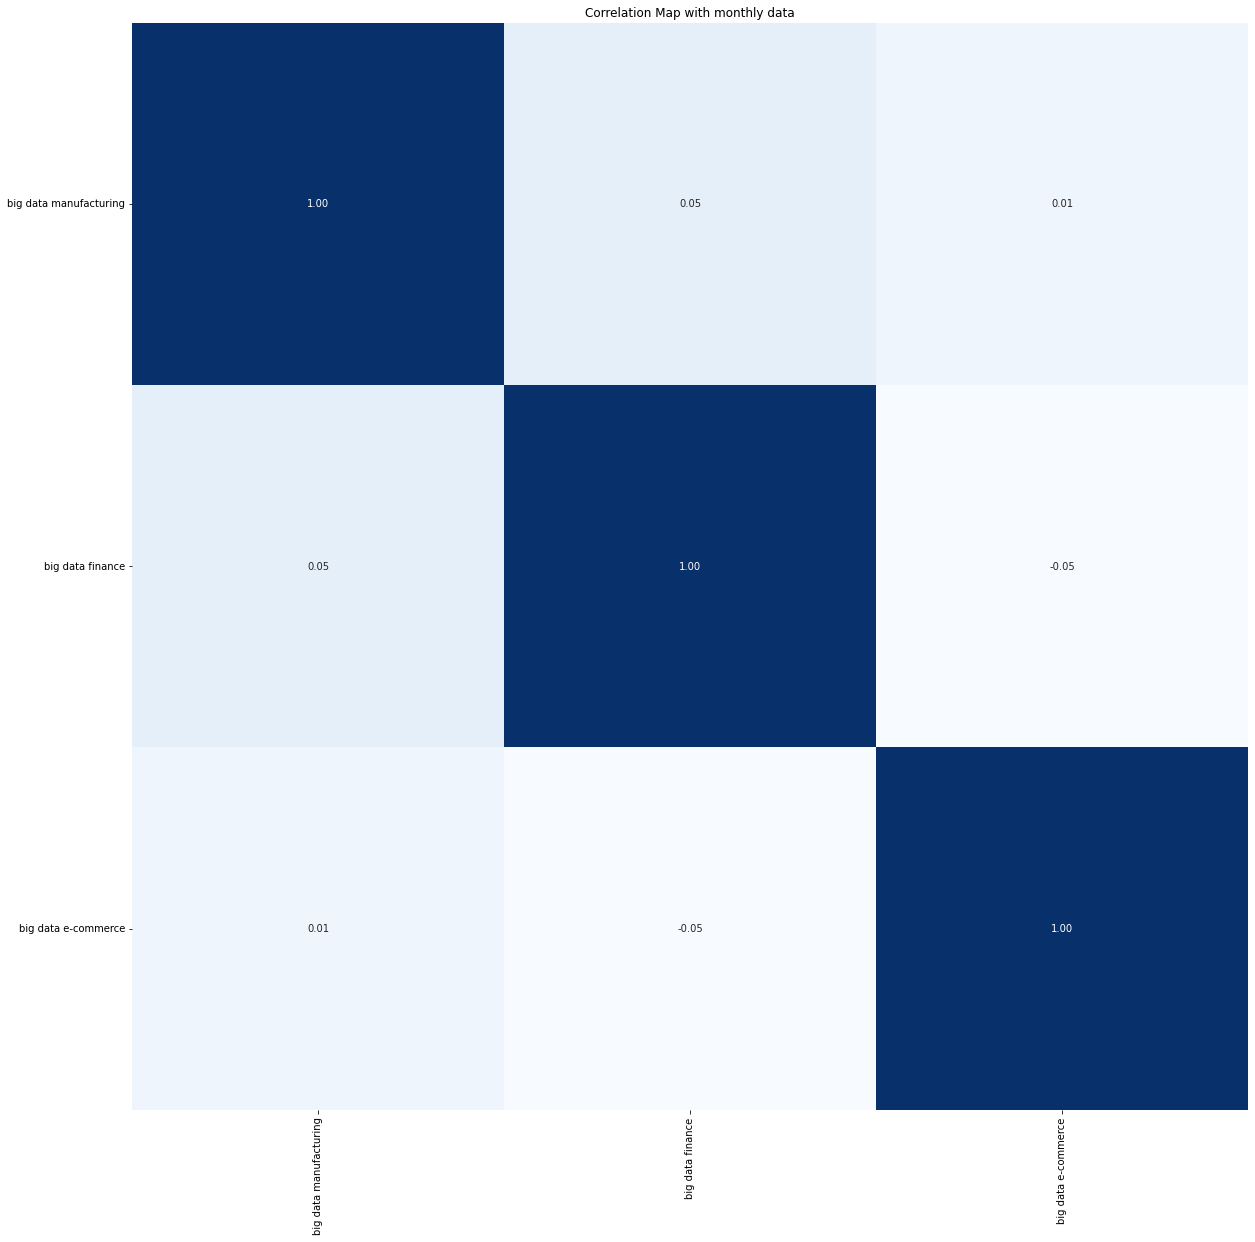

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(df_kwords.corr(),cmap='Blues',annot=True,fmt = ".2f",cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Map with monthly data')
plt.show()

In [68]:
kw_list = set_new_query(["Apache tools"], "2020-03-01 2022-03-01")
table_related_queries(kw_list, get_related_queries());

Apache tools related queries


Top                        Rising       
             query value                   query  value
1     apache spark   100       apache openoffice  130.0
2            spark   100           elasticsearch  100.0
3    apache server    94          apache airflow   80.0
4     apache kafka    81                 airflow   80.0
5            kafka    81                 postman   70.0
6        etl tools    71            apache atlas   70.0
7   big data tools    67  apache tomcat download   60.0
8    apache hadoop    63      data lineage tools   60.0
9           hadoop    63                  github   50.0
10  apache airflow    57           apache jmeter   50.0

In [72]:
kw_list = set_new_query(["apache spark", "apache flink", "apache storm", "apache hive", ], 
                        "2020-01-01 2022-03-01")
df_apache = table_interest_over_time(kw_list, None, True);

In [73]:
fig = px.line(df_apache, x=df_apache['Date'], y=df_apache.columns, title = 'Line Graph for all Features')
fig.show()